In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plot_bar(df, xlabel, ylabel, title, figsize=(15,10),rotation=0):
    plot = df.plot(kind='bar',figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=12)
    plot.set_ylabel(ylabel, fontsize=12)
    plot.set_title(title, fontsize=25)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

In [3]:
retail = pd.read_csv('cleansingRetail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [4]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### 고객에서 보내는 푸쉬 알림

#### 고객에게 쿠폰 알림을 보내는 것을 고려했을 때 생기는 고려사항
  - 1. 언제 보내는 것이 좋을까
  - 2. 출퇴근 시간??
  - 3. 점심 시간??
  - 4. 자기 전시간??

- 실제로 많은 의사결정이 본인 혹은 주변의 경험에 의해서 이뤄지는 것을 많이 볼 수 있습니다.
- 이러한 '감'과 '경험'에 의존한 의사결정은 정확한 판단을 할 수 없게 만듭니다.
- 데이터를 기반한 의사결정을 하는 방법으로는 다음과 같이 있습니다.
  - 1. 데이터로 파악
  - 2. 가설 제시
  - 3. 가설 검증
  - 4. 원하는 결과가 나올 때까지 1-3 반복

In [5]:
order_by_time = retail.set_index('InvoiceDate').groupby(lambda date: date.hour).count()['CustomerID']

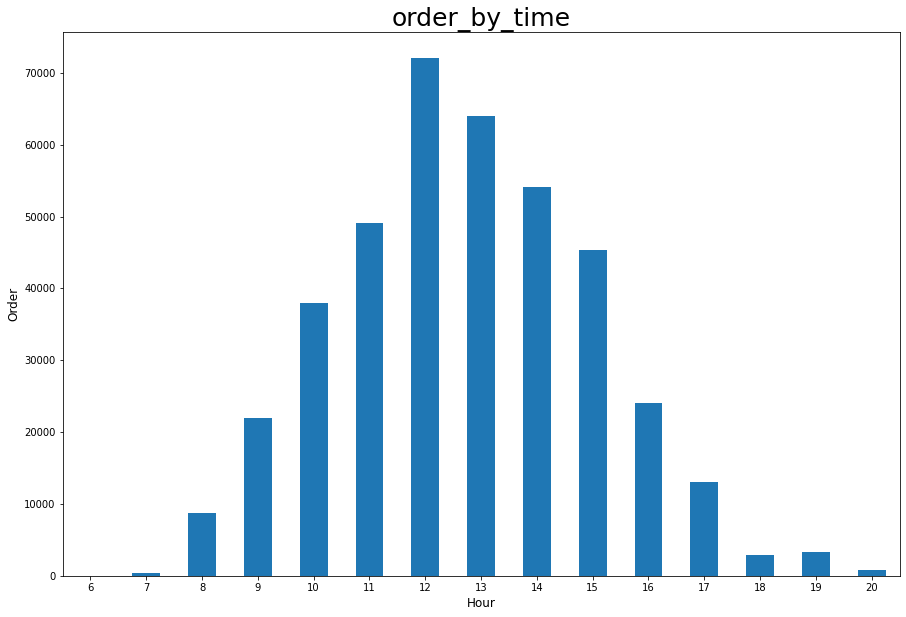

In [6]:
plot_bar(order_by_time, 'Hour', 'Order', 'order_by_time')

In [7]:
def half_hour(date):
    minute = ':00'
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)
    if date.hour < 10:
        hour = '0' + hour
    
    return hour + minute

In [9]:
order_half_hour = retail.set_index('InvoiceDate').groupby(half_hour).count()['CustomerID']
order_half_hour

06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

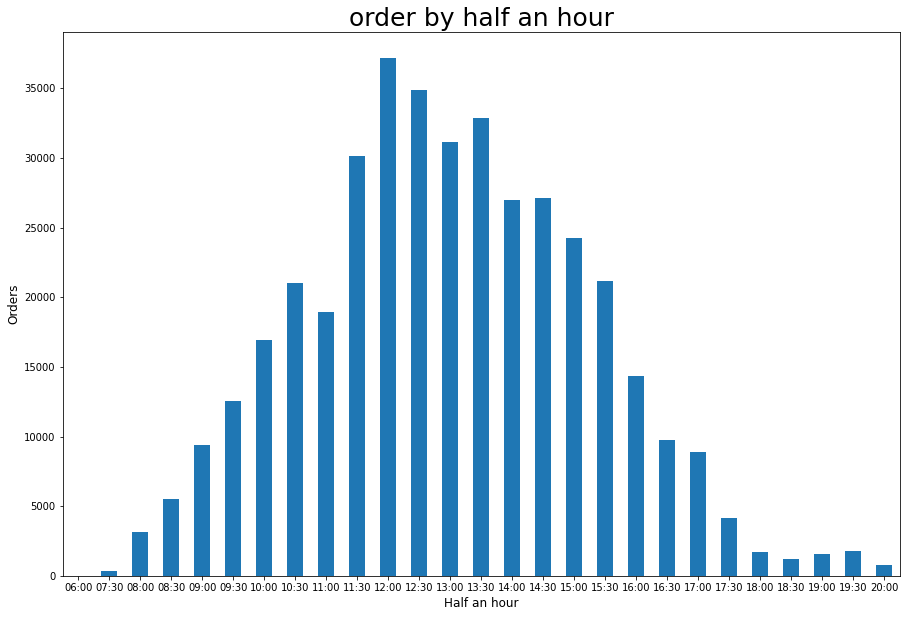

In [12]:
plot_bar(order_half_hour,'Half an hour','Orders','order by half an hour')